# Modelo de regresión lineal

Se puede definir al modelo de regresión lineal como una función $f(x)$ con polinomio de grado 1 y que se puede esquematizar de la siguiente manera:  

$$ y = \alpha + \beta (x)$$

Donde $y$ seria la variable dependiente, $x$ la variable independiente, $\beta$ la pendiente o inclinación de la recta y $\alpha$ el corte con el eje.  

Inicialmente vamos a considerar el error, como la diferencia entre el dato real y el valor estimado:  
$$e_i = (y_i - Y_e(x_i))$$

El objetivo es minimizar la suma de los errores al cuadrado (**técnica de minimos cuadrados**) sobre los puntos de un data set:
$$ min \sum_{i = 1}^{n} e_i^{2} = \sum_{i = 1}^{n} (y_i - Y_e(x_i))^2 = \sum_{i = 1}^{n} (y_i - (\alpha + \beta*x_i))^2$$

Utilizando el cálculo diferencial, se puede estimar que los valores de $\beta$ y $\alpha$ pueden hallarse de la siguiente manera:  

$$\beta = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x,y)}$$  
$$\alpha = \bar{y} - \beta*\bar{x}$$

Donde $\bar{x}, \bar{y}$ representan las medias respectivas de cada variable

Aunque usualmente, el modelo lineal no puede explicar en un 100% la distribución de probabilidad de un data set. Es por esto, que a nuestra ecuación que explica el modelo siempre debemos adicionarle un parametro que estima el error:  
$$ y = \alpha + \beta (x) + E$$


### Ejercicio
#### Modelo con datos simulados

* $y = a + b*x$
* x : 100 valores distribuidos según N(1.5, 2.5)

* Ye = 8 + 0.6 * x + e --> estimación del modelo
* e: Estará distribuido según una normal N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
residuos = 0 + 0.8*np.random.randn(100)

In [4]:
y_estim = 8 + 0.6*x

In [5]:
y_actual = 8 + 0.86*x + residuos

In [6]:
x_lista = x.tolist()
y_estim_list = y_estim.tolist()
y_actual_lista = y_actual.tolist()

In [7]:
dataframe = pd.DataFrame(
    {
        "x": x_lista,
        "y_actual": y_actual_lista,
        "y_predicc": y_estim_list
    }

)

In [8]:
dataframe.head()

,x,y_actual,y_predicc
0,4.345515,11.667035,10.607309
1,-0.490780,6.741193,7.705532
2,3.258378,10.695882,9.955027
3,3.904206,10.691201,10.342524
4,-1.033128,7.308304,7.380123


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_actual) for i in range(1, len(x_lista)+ 1)]

Text(0.5, 1.0, 'Valor actual Vs. Predicción')

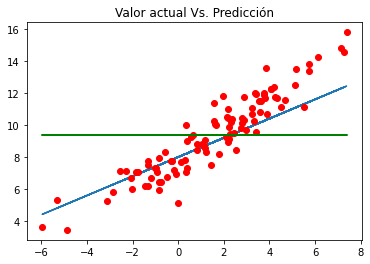

In [11]:
%matplotlib inline
plt.plot(x, y_estim)
plt.plot(x, y_actual, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual Vs. Predicción")

Sin embargo, se pueden observar puntos que se alejan de la recta estimada del modelo. Son datos conocidos como datos observados (**y_actual**). El desplazamiento de los puntos observados con respecto a la recta del modelo (y_estim) es conocido como **SSD** (suma de la diferencia de los cuadrados). Adicionalmente, observamos que tambien existe una separación entre los puntos observados y la respectiva recta de las medias trazada en color verde. Esta distancia se conoco como **SST** (suma de los cuadrados totales). Y por ultimo, tenemos la distancia que se halla entre la recta estimada y la recta de los promedios (Recta azul y recta verde respectivamente). A esta diferencia se le conoce como **SSR** (suma de los cuadrados de la regresión).

$$ SST = SSR + SSD $$
$$ R^2 = \frac{SSR}{SST} $$

In [12]:
dataframe["SSR"]= (dataframe["y_predicc"] - np.mean(y_actual))**2
dataframe["SSD"]= (dataframe["y_predicc"]-dataframe["y_actual"])**2
dataframe["SST"]= (dataframe["y_actual"]-np.mean(y_actual))**2

In [13]:
dataframe.head()

,x,y_actual,y_predicc,SSR,SSD,SST
0,4.345515,11.667035,10.607309,1.461563,1.123019,5.146897
1,-0.490780,6.741193,7.705532,2.865659,0.929949,7.060523
2,3.258378,10.695882,9.955027,0.309880,0.548866,1.683568
3,3.904206,10.691201,10.342524,0.891449,0.121576,1.671443
4,-1.033128,7.308304,7.380123,4.073272,0.005158,4.368325


In [14]:
SSR = sum(dataframe["SSR"])
SSD = sum(dataframe["SSD"])
SST = sum(dataframe["SST"])

In [15]:
SSR

279.0257439472229

In [16]:
SSD

158.47627258464837

In [17]:
SST

625.8241191529438

In [18]:
r2 = SSR/SST

In [19]:
r2

0.44585329233537

El modelo se ajusta de acuerdo al comportamiento de los datos

(array([ 1.,  2.,  6., 14., 13., 21., 13., 17.,  7.,  6.]),
 array([-2.91387931, -2.45436679, -1.99485427, -1.53534174, -1.07582922,
        -0.6163167 , -0.15680418,  0.30270835,  0.76222087,  1.22173339,
         1.68124592]),
 <BarContainer object of 10 artists>)

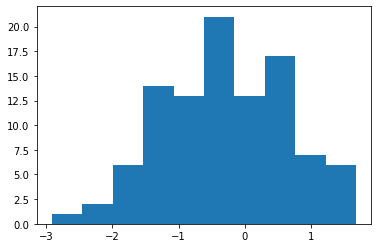

In [87]:
plt.hist(dataframe["y_predicc"]-dataframe["y_actual"])

## Obteniendo la recta de regresión

In [20]:
x_mean = np.mean(dataframe["x"])
y_mean = np.mean(dataframe["y_actual"])
x_mean, y_mean

(1.5206980047719554, 9.398357781808421)

In [21]:
dataframe["beta_n"] = (dataframe["x"]-x_mean)*(dataframe["y_actual"]-y_mean)
dataframe["beta_d"] = (dataframe["x"]-x_mean)**2

In [22]:
beta = sum(dataframe["beta_n"])/sum(dataframe["beta_d"])

In [23]:
alpha = y_mean - beta * x_mean

In [24]:
alpha, beta

(8.065207619618377, 0.8766698963282746)

EL modelo obtenido por regresión es:  
$$ y = 8.05222622741971 + 0.7985107375816947*x$$

In [25]:
dataframe["y_modelo"] = alpha + beta*dataframe["x"]

In [26]:
dataframe.head()

,x,y_actual,y_predicc,SSR,SSD,SST,beta_n,beta_d,y_modelo
0,4.345515,11.667035,10.607309,1.461563,1.123019,5.146897,6.408598,7.979591,11.874790
1,-0.490780,6.741193,7.705532,2.865659,0.929949,7.060523,5.344828,4.046043,7.634956
2,3.258378,10.695882,9.955027,0.309880,0.548866,1.683568,2.254681,3.019531,10.921729
3,3.904206,10.691201,10.342524,0.891449,0.121576,1.671443,3.081502,5.681111,11.487908
4,-1.033128,7.308304,7.380123,4.073272,0.005158,4.368325,5.337634,6.522029,7.159495


In [27]:
SSR = sum((dataframe["y_modelo"]-y_mean)**2)
SSD = sum ((dataframe["y_modelo"]-dataframe["y_actual"])**2)
SST = sum((dataframe["y_actual"]-y_mean)**2)

In [28]:
SSR, SSD, SST

(545.2693818495017, 80.55473730344268, 625.8241191529438)

In [29]:
r2_ajustado = SSR/SST
r2_ajustado

0.8712821464719618

## El p valor

Para comprobar la existencia de una relación lineal, planteamos el contraste de hipótesis.

$$
\left.
H_0 : \beta = 0 \atop
H_a : \beta \neq 0 
\right\}
$$

### Error estándar residual (RSE)

In [32]:
RSE = np.sqrt(SSD/(len(dataframe)-2))
RSE

0.9066350508011765